In [1]:
import csv
o = open('laserdata.csv', 'rU')
mydata = csv.reader(o)

laseAngles2 = []
laserDepths = []
for row in mydata:
    laseAngles2.append(float(row[0]))
    laserDepths.append(float(row[1]))

Populating the interactive namespace from numpy and matplotlib


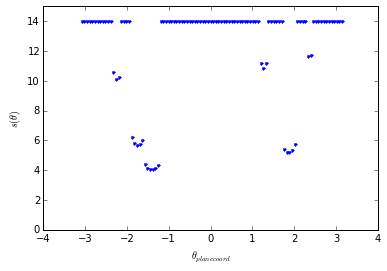

In [2]:
%pylab inline

plt.plot(laseAngles2,laserDepths,'.')
plt.xlabel(r'$\theta_{plane coord}$')
plt.ylabel(r'$s(\theta)$')
plt.axis([-4, 4, 0, 15])
plt.show()

In [3]:
# Approximation of linear combination of three Gaussians (separated by 2pi) over the range [-pi,pi]

from sympy.mpmath import *
I = [-math.pi, math.pi]
N = 12   # number of Fourier-approximation-of-3-Gaussian basis functions
M = 6    # order of Fourier series
sig = 0.4

In [4]:
cslist = []

M=6
for i in np.linspace(-3.14,3.14-3.14/11,N):
    print i

    f = lambda x: 2.71 ** (-(x-i)**2 / (2*sig**2)) + 2.71 ** (-(x-i-2*math.pi)**2 / (2*sig**2)) + 2.71 ** (-(x-i+2*math.pi)**2 / (2*sig**2))

    x = np.linspace(-10,10,1000)
    y = f(x) 
    cs = fourier(f, I, M)
    cslist.append(cs)

-3.14
-2.59504132231
-2.05008264463
-1.50512396694
-0.960165289256
-0.41520661157
0.129752066116
0.674710743802
1.21966942149
1.76462809917
2.30958677686
2.85454545455


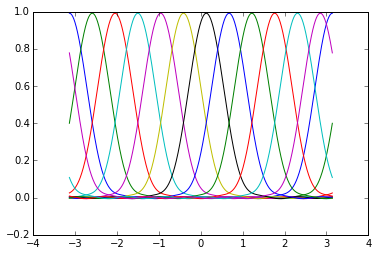

In [5]:
for i in range(len(cslist)):
    cs = cslist[i]
#print cs1
#print len(cs1)
#print len(cs1[0])
#print len(cs1[1])

    def f_basis_practice(x):
        b = math.pi
        a = -math.pi
        m = 2.0*math.pi / (b - a)
        y = 0
        M = 6
        for k in range(M+1):

            y = y + cs[0][k] * math.cos(k * m * x)
            y = y + cs[1][k] * math.sin(k * m * x)
        return y

    x = np.linspace(-math.pi,math.pi,1000)
    y = x * 0.0
    for i in range(len(x)):
        y[i] = f_basis_practice(x[i])

    plt.plot(x,y)
    
plt.show()

regression weights for M = 11
[  1.41215115e+01  -3.30700924e+00   1.37061577e+00   8.04642436e+00
  -4.02415324e+00  -4.13237657e+00   1.45466781e+00   8.49573639e-01
  -1.83352013e-01  -7.69997810e-02   7.70796695e-03   2.56270409e-03]


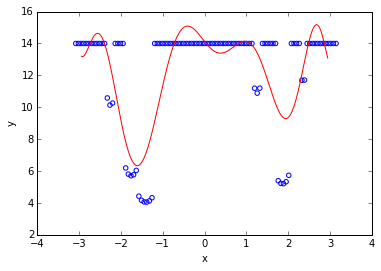

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ -1.24951795e-03   3.52682367e-02   4.96600583e-01 ...,   1.23877309e-03
    1.42468657e-03  -4.24750922e-03]
 [  1.77611472e-03   5.06501668e-02   5.90960762e-01 ...,  -7.82425163e-04
    3.33052919e-03  -5.44798079e-03]
 [  5.01227449e-03   7.36127122e-02   6.84645704e-01 ...,  -2.67807878e-03
    4.67420740e-03  -5.64340475e-03]
 ..., 
 [ -5.69583087e-03   1.56927798e-02   2.47814733e-01 ...,   4.77554444e-03
   -4.12032049e-03   2.23322405e-03]
 [ -5.23447516e-03   1.95202916e-02   3.21970910e-01 ...,   4.28277708e-03
   -2.65887768e-03  -5.23338020e-06]
 [ -3.69178452e-03   2.55126828e-02   4.05768489e-01 ...,   3.03134575e-03
   -6.97070818e-04  -2.30698318e-03]]
regression weights for M = 11
[  6.9727888    6.11894539  10.75301128  -5.74213537  14.34971927
   3.42088645  11.036131

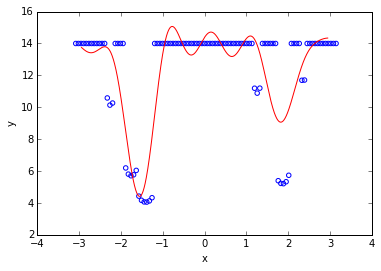

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from linear_regression import LinearRegression
from gradient_descent import GradientDescent, quad, quadGrad
%matplotlib inline

def plot(lr,w):
    # plot sin(2*phi*x) in green
    x = np.linspace(-math.pi+0.2,math.pi-0.2,1000)
    lr_temp = LinearRegression(x,x,lr.numFeatures-1)
    reg_prediction = np.dot(lr_temp.phi,w)
    plt.plot(x, reg_prediction, color='r')
    plt.scatter(lr.x, lr.y, color='b', marker='o',facecolors='none')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
def plotRBFbases(lr,w):
    # plot sin(2*phi*x) in green
    x = np.linspace(-math.pi+0.2,math.pi-0.2,1000)
    reg_prediction = w[0]*lr.bases[0](x) + w[1]*lr.bases[1](x) + w[2]*lr.bases[2](x) + w[3]*lr.bases[3](x) + \
                     w[4]*lr.bases[4](x) + w[5]*lr.bases[5](x) + w[6]*lr.bases[6](x) + w[7]*lr.bases[7](x) + \
                     w[8]*lr.bases[8](x) + w[9]*lr.bases[9](x) + w[10]*lr.bases[10](x) + w[11]*lr.bases[11](x)
    plt.plot(x, reg_prediction, color='r')
    plt.scatter(lr.x, lr.y, color='b', marker='o',facecolors='none')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

M = 11
lr = LinearRegression(laseAngles2,laserDepths,M)
w = lr.reg()
w_initial = 0*np.zeros((1,12))
print "regression weights for M = " + str(M)
print w
plot(lr,w)


N = 12
lr = LinearRegression(laseAngles2,laserDepths,11)
lr.setBases(N,cslist)
lr.RBF_Phi(N)
w = lr.reg()
print "regression weights for M = " + str(M)
print w
plotRBFbases(lr,w)




[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ -1.24951795e-03   3.52682367e-02   4.96600583e-01 ...,   1.23877309e-03
    1.42468657e-03  -4.24750922e-03]
 [  1.77611472e-03   5.06501668e-02   5.90960762e-01 ...,  -7.82425163e-04
    3.33052919e-03  -5.44798079e-03]
 [  5.01227449e-03   7.36127122e-02   6.84645704e-01 ...,  -2.67807878e-03
    4.67420740e-03  -5.64340475e-03]
 ..., 
 [ -5.69583087e-03   1.56927798e-02   2.47814733e-01 ...,   4.77554444e-03
   -4.12032049e-03   2.23322405e-03]
 [ -5.23447516e-03   1.95202916e-02   3.21970910e-01 ...,   4.28277708e-03
   -2.65887768e-03  -5.23338020e-06]
 [ -3.69178452e-03   2.55126828e-02   4.05768489e-01 ...,   3.03134575e-03
   -6.97070818e-04  -2.30698318e-03]]
 
--- Minimization Summary --- 
x_min is = [  6.9710507    6.11980896  10.75242596  -5.74170671  14.34938274
   3.421179

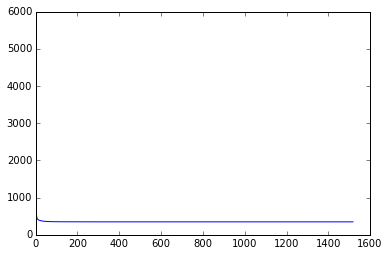

 
--- Scipy Minimization Summary --- 
x_min is = [  6.9727873    6.11894574  10.75301178  -5.74213623  14.34972056
   3.42088472  11.0361332    4.08158594  11.81287846   0.46150382
   9.4493422    4.44450091]
f_min is = 347.860550305
numFunctionCalls = 392
---------------------------- 
 
|w_gd - w_ols|^2 is
0.00299722603884


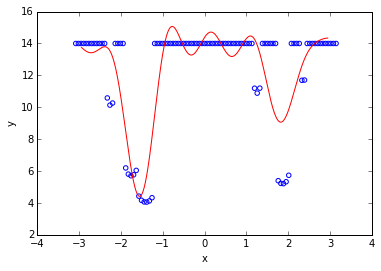

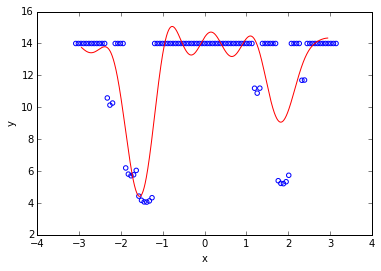

In [13]:
def gradDescentSSE():
    N = 12
    lr = LinearRegression(laseAngles2,laserDepths,11)
    lr.setBases(N,cslist)
    lr.RBF_Phi(N)
    w_initial = 0*np.zeros((1,12))[0]
    gd = GradientDescent(lr.SSE, lr.SSE_gradient)
    gd.stepSize = 0.025
    gd.tol = 1e-8
    (w, sse, _, _) = gd.computeMin(w_initial, printSummary=True, storeIterValues=True, useGradientCriterion=False, maxFunctionCalls=50000)
    gd.plotIterValues()
    
    res = opt.minimize(lr.SSE, w_initial)
    print " "
    print "--- Scipy Minimization Summary --- "
    print "x_min is = " + str(res.x)
    print "f_min is = " + str(res.fun)
    print "numFunctionCalls = " + str(res.nfev)
#     print "numIterations = " + str(res.nit)
    print "---------------------------- "
    print " "
    
    print "|w_gd - w_ols|^2 is"
    print np.linalg.norm(w - res.x)
    
    plotRBFbases(lr,w)
    plotRBFbases(lr,res.x)
    plt.show()
    
    
    return (lr, gd, w, sse)

(lr, gd, w, sse) = gradDescentSSE()

In [8]:
N = 12
lr = LinearRegression(laseAngles2,laserDepths,11)
lr.setBases(N,cslist)
lr.RBF_Phi(N)

print lr.bases[0](1)
print lr.bases[1](1)
print lr.bases[2](1)
print lr.bases[3](1)
print lr.bases[4](1)
print lr.bases[5](1)
print lr.bases[6](1)
print lr.bases[7](1)
print lr.bases[8](1)
print lr.bases[9](1)
print lr.bases[10](1)
print lr.bases[11](1)


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ -1.24951795e-03   3.52682367e-02   4.96600583e-01 ...,   1.23877309e-03
    1.42468657e-03  -4.24750922e-03]
 [  1.77611472e-03   5.06501668e-02   5.90960762e-01 ...,  -7.82425163e-04
    3.33052919e-03  -5.44798079e-03]
 [  5.01227449e-03   7.36127122e-02   6.84645704e-01 ...,  -2.67807878e-03
    4.67420740e-03  -5.64340475e-03]
 ..., 
 [ -5.69583087e-03   1.56927798e-02   2.47814733e-01 ...,   4.77554444e-03
   -4.12032049e-03   2.23322405e-03]
 [ -5.23447516e-03   1.95202916e-02   3.21970910e-01 ...,   4.28277708e-03
   -2.65887768e-03  -5.23338020e-06]
 [ -3.69178452e-03   2.55126828e-02   4.05768489e-01 ...,   3.03134575e-03
   -6.97070818e-04  -2.30698318e-03]]
0.00467156357629887
-0.00486194400527688
0.00389741010968607
-0.00197180106350069
-0.000875740106564684
0.00644912820184